In [ ]:
from google.colab import files
uploaded = files.upload()

Saving shutterstock_445338970-1024x768.jpg to shutterstock_445338970-1024x768.jpg


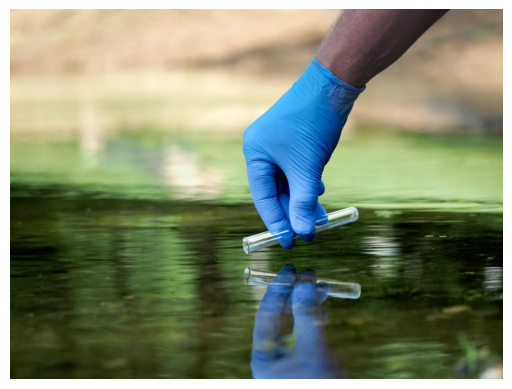

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
photo_path = "shutterstock_445338970-1024x768.jpg"
img = mpimg.imread(photo_path)
plt.imshow(img)
plt.axis('off')
plt.show()


# **import main library**




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

# **import the data**

In [ ]:
data = pd.read_excel("water_potability (1).xlsx")
dataLogistic=data.copy()

# **overview the data**

In [ ]:
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
data["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

# **Visualization Data**

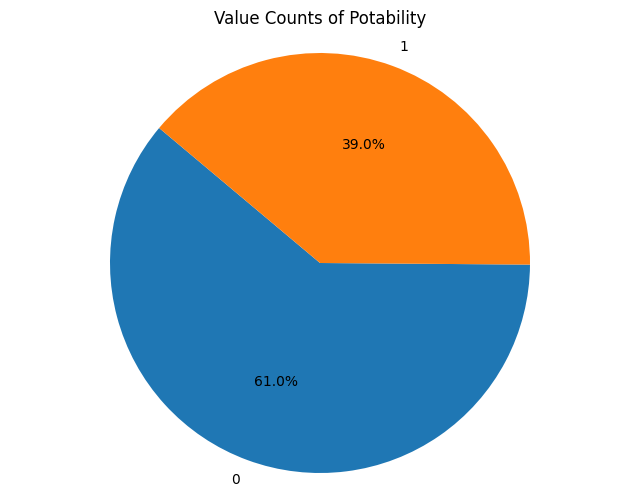

In [ ]:
# Calculate value counts of a column
value_counts = data['Potability'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Value Counts of Potability')
plt.axis('equal')
plt.show()

# **Overview duplicated values**

In [ ]:
data.duplicated().sum()

0

So No Duplicates

# **Overview Null values**

In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# **Showing Correlation**

In [ ]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


# **Starting Preprocessing**

In [ ]:
# split the data using group by function to two groups according to Potability and replacing the null values with the mean of each group
data['ph']=data['ph'].fillna(data.groupby(['Potability'])['ph'].transform('mean'))
data['Sulfate']=data['Sulfate'].fillna(data.groupby(['Potability'])['Sulfate'].transform('mean'))
data['Trihalomethanes']=data['Trihalomethanes'].fillna(data.groupby(['Potability'])['Trihalomethanes'].transform('mean'))
# replace nulls with mean
#data=data.fillna(data.mean())

# **Overview Null Values After replacing by mean**

In [ ]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# **Draw Boxplots**

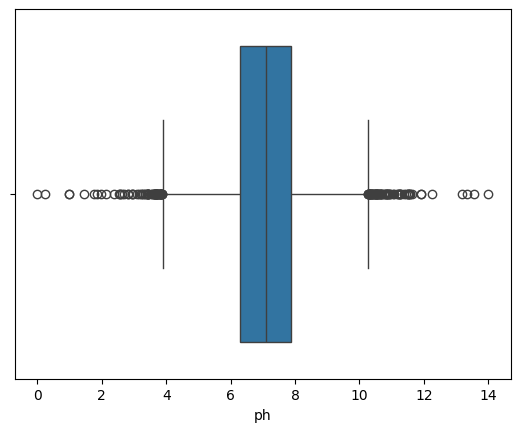

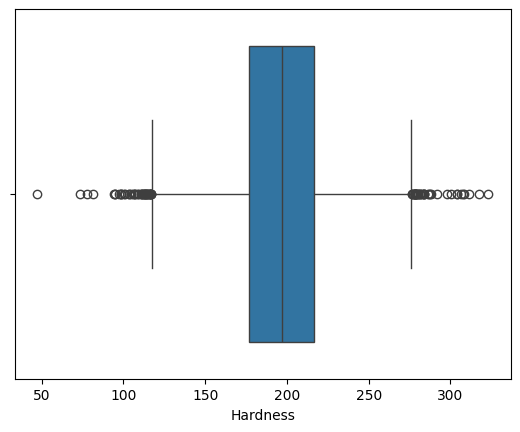

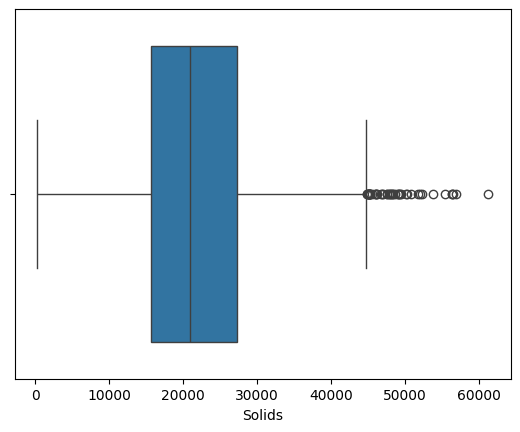

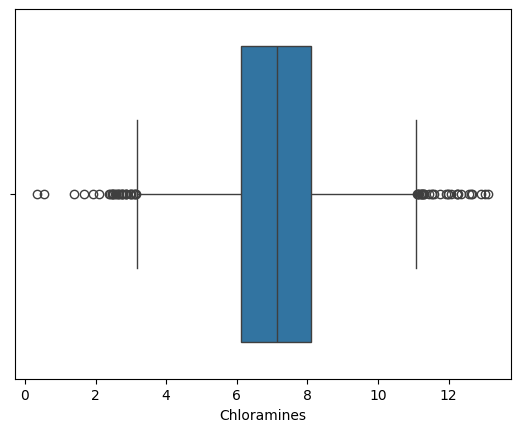

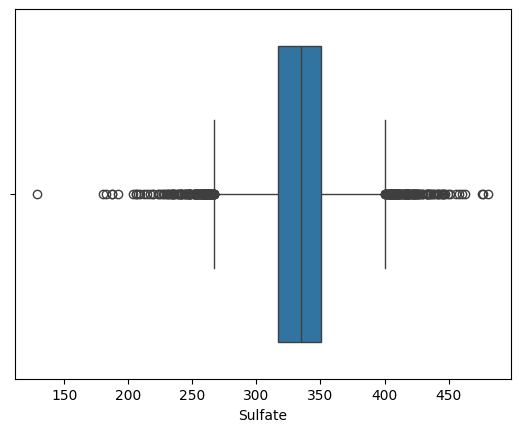

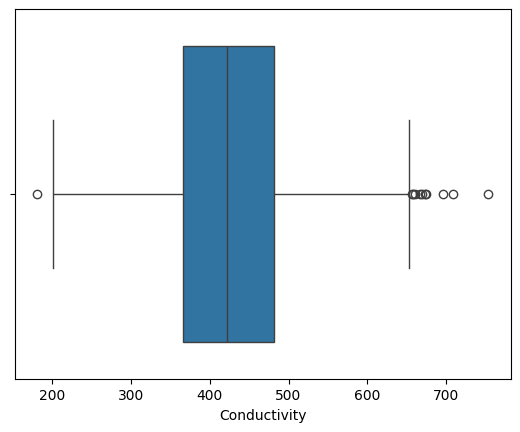

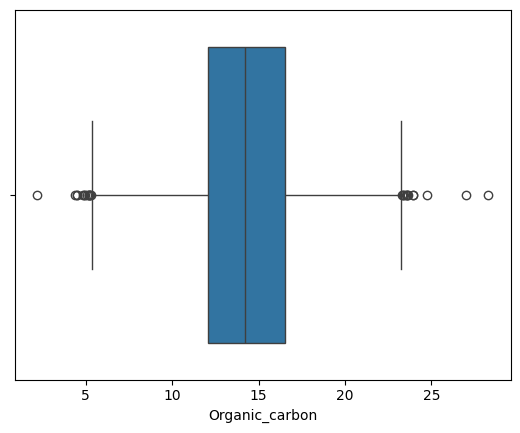

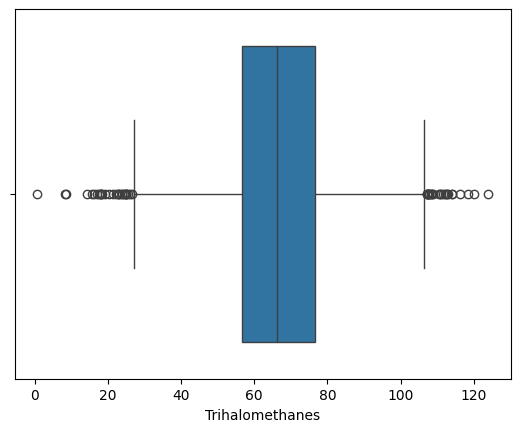

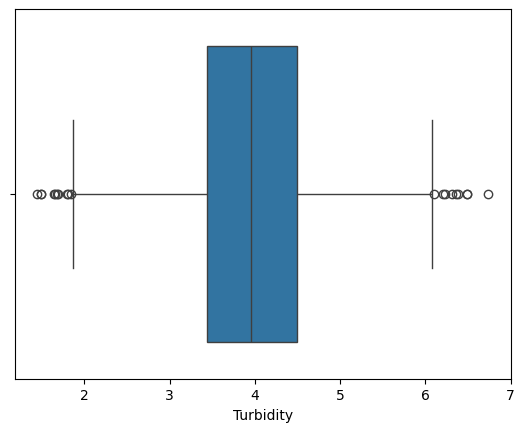

In [ ]:
for col in data.columns:
    if  col!='Potability':
        sns.boxplot(x=data[col])
    plt.show()

# **Handling Outliers**

In [ ]:
for col in data.columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1

  #remove outliers
  data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]

  #replace outliers with upper bound and lower bound
  #lower_bound = Q1 - 1.5 * IQR
  #upper_bound = Q3 + 1.5 * IQR
  # data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
  # data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

  #replace outliers with mean
  # non_outliers = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
  # mean_value = non_outliers[col].mean()
  # data[col] = np.where(data[col] < lower_bound, mean_value, data[col])
  # data[col] = np.where(data[col] > upper_bound, mean_value, data[col])

# **Showing distributions**

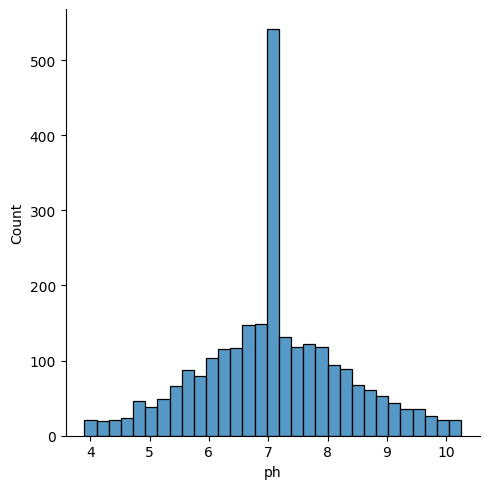

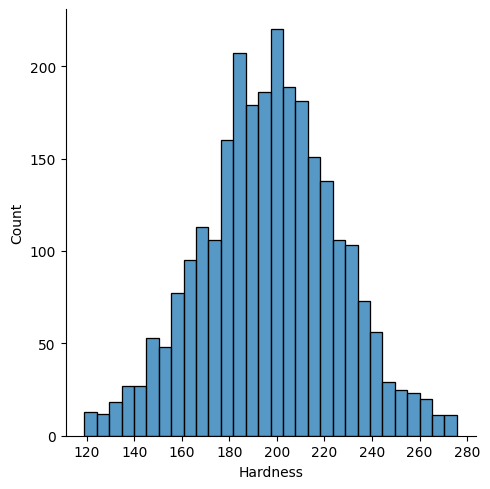

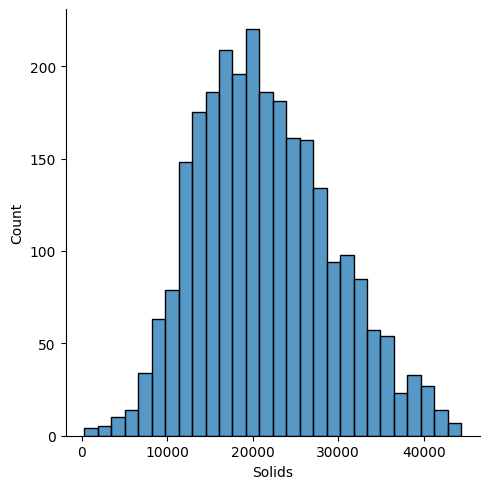

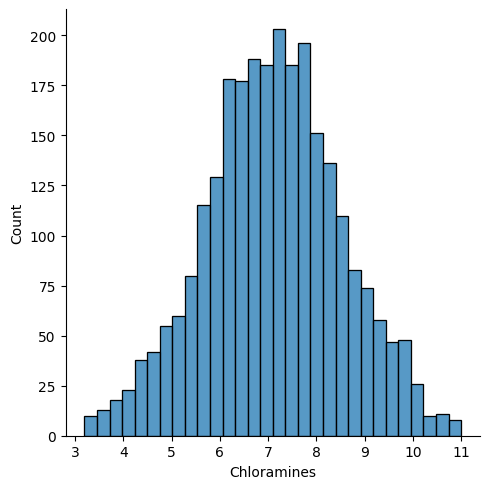

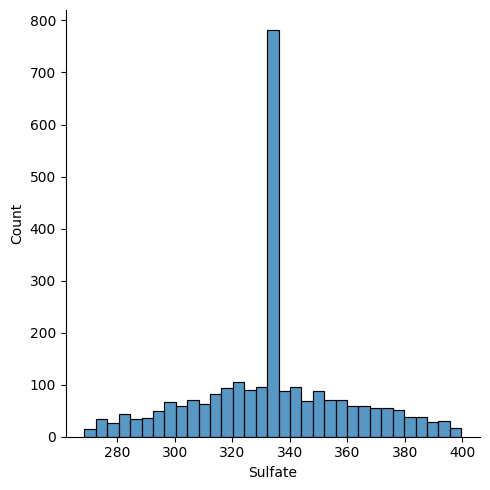

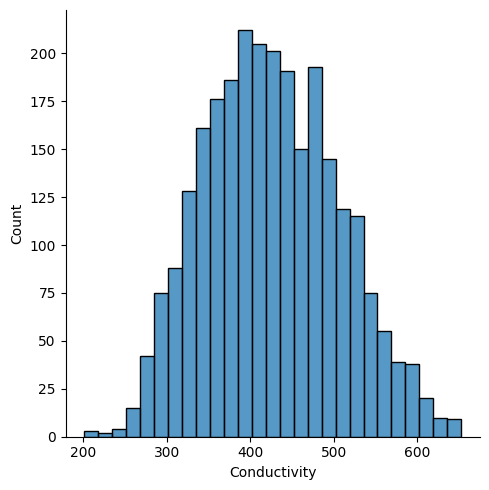

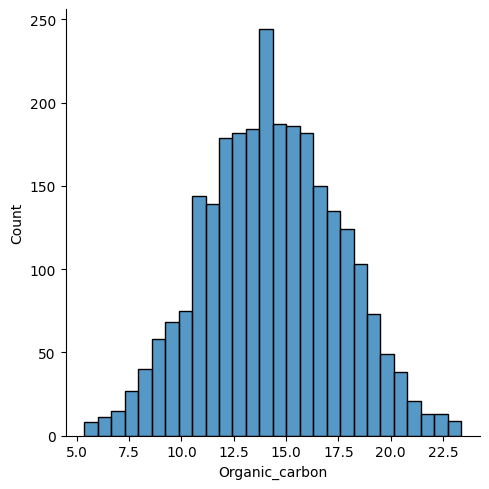

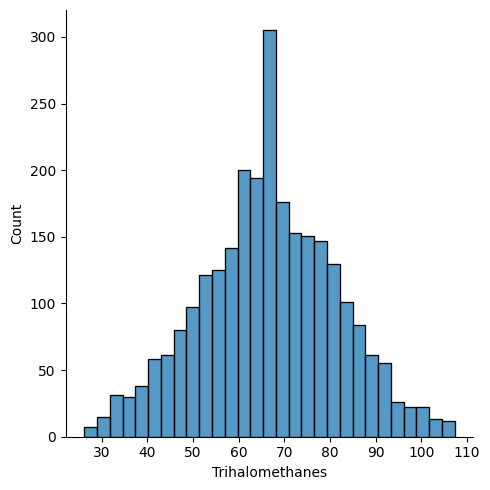

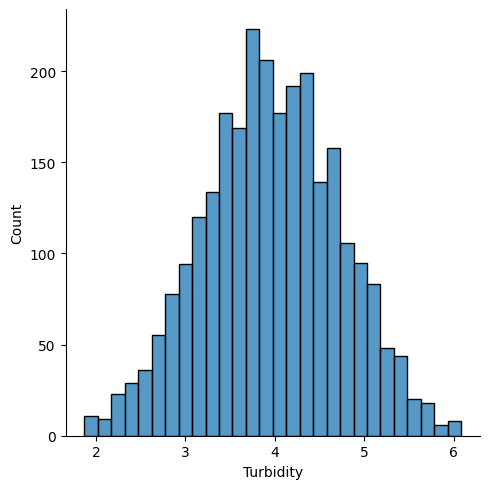

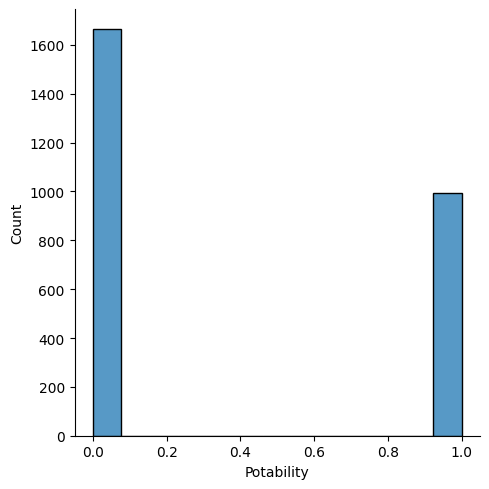

In [ ]:
for col in data.columns:
    if data[col].dtype !='object':
        sns.displot(x=data[col])
    plt.show()

# **Showing correlation By Heatmap**

<Axes: >

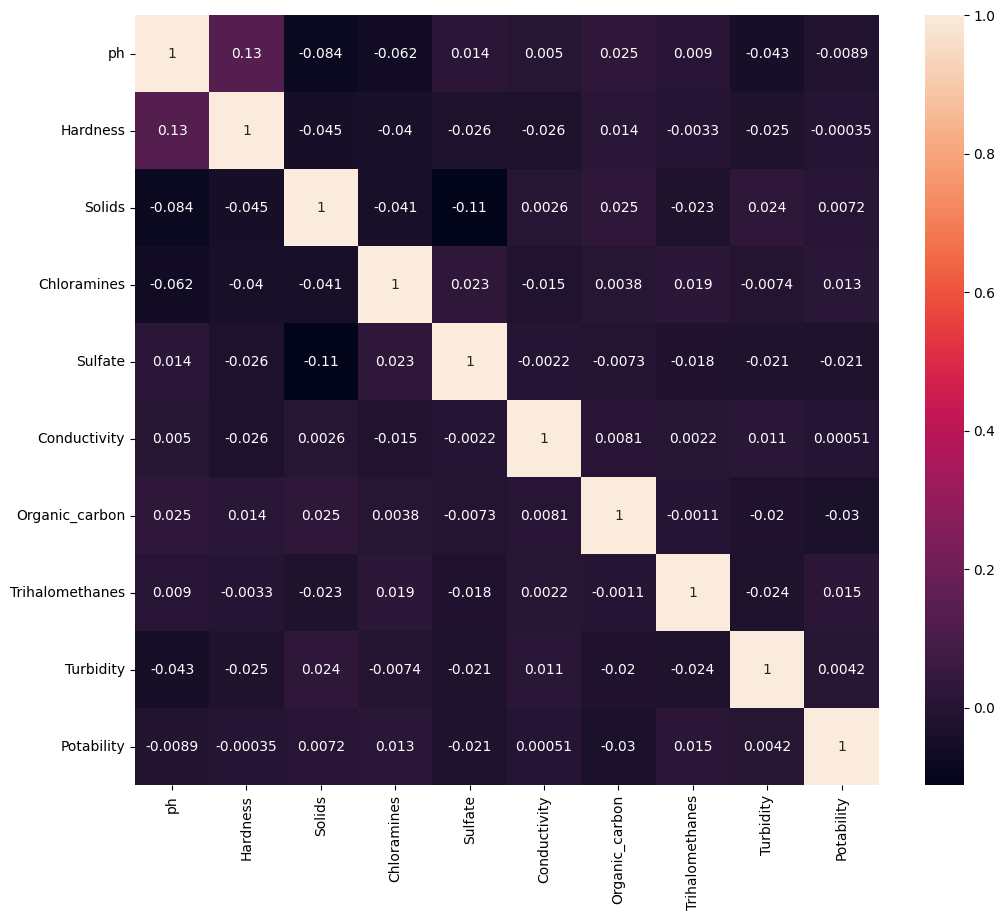

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)

# **Since Hardness and Conductivity have the weakest correlation with Potability we can drop them**

In [ ]:
data.drop(columns=['Hardness','Conductivity'],inplace=True)

# **Scaling Data**

In [ ]:

# scaling solids only
# scaler = StandardScaler()
# data['Solids'] = scaler.fit_transform(data[['Solids']])
X = data.drop(columns=["Potability"])
y = data["Potability"]
#standard Scaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

#MinMax Scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

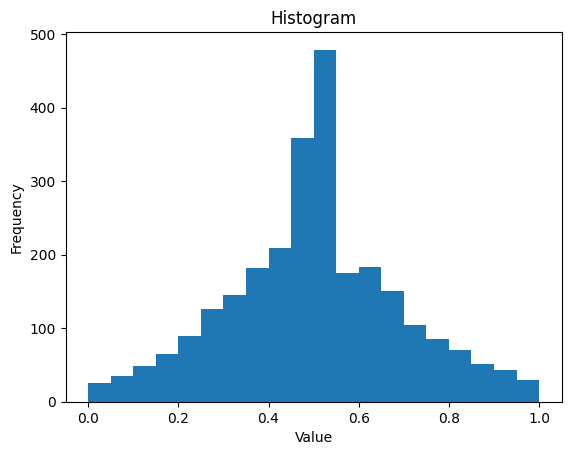

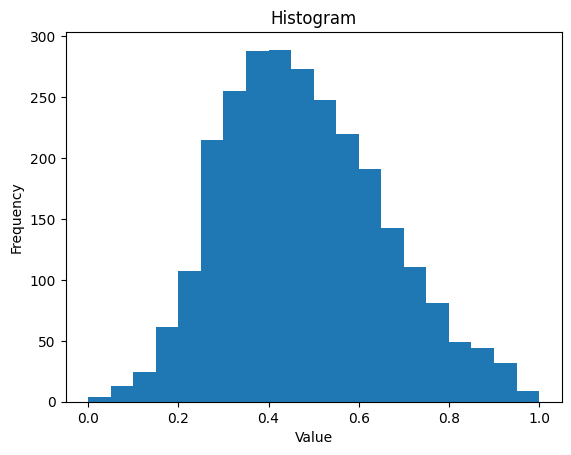

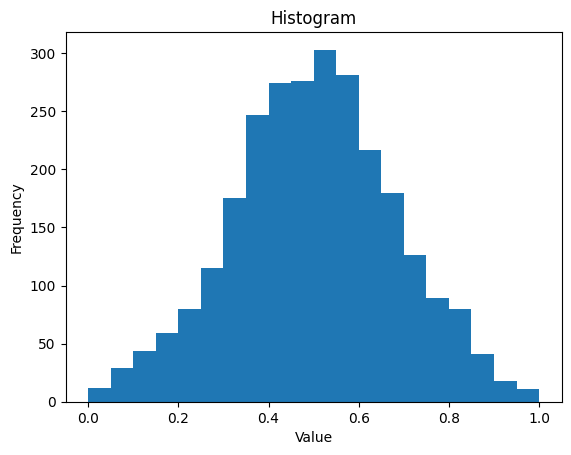

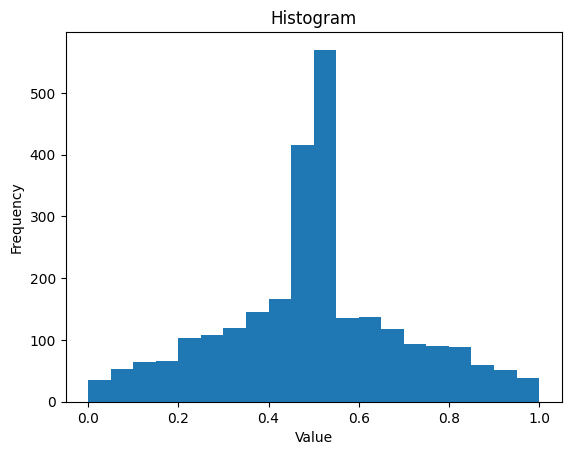

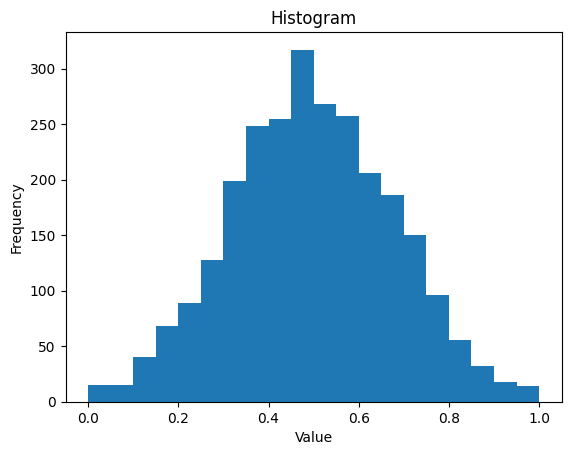

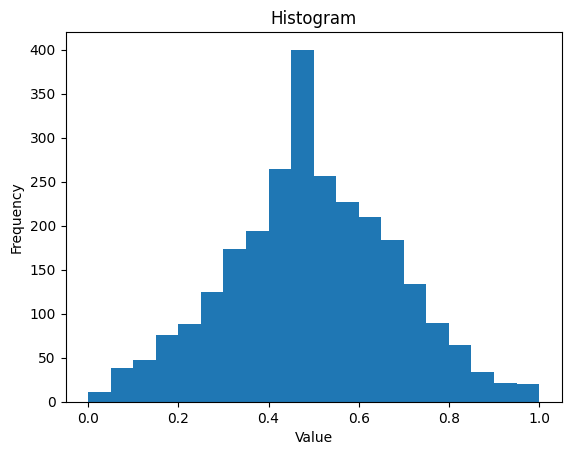

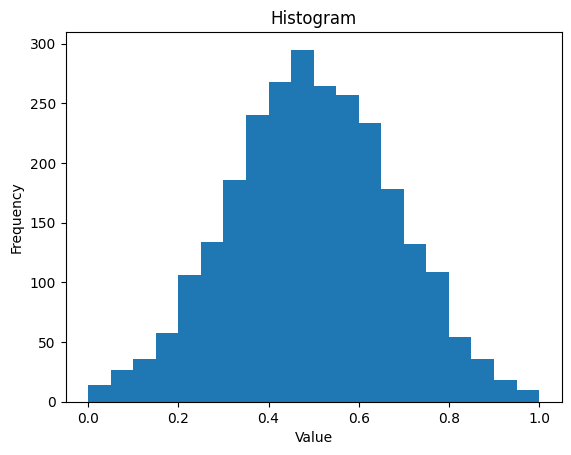

In [ ]:
X_df = pd.DataFrame(X)
for col in X_df:
  plt.hist(X_df[col], bins=20)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.title('Histogram')
  plt.show()

# **Over Sampling technique by smote**

In [ ]:
#smote sampling for all the data
print("Original class distribution:")
print(pd.Series(y).value_counts())
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

print("\nResampled class distribution:")
print(pd.Series(y).value_counts())
#Random over sampling
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)
# X = data.drop(columns=["Potability"])
# y = data["Potability"]
# X_resampled, y_resampled = ros.fit_resample(X, y)
# data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Potability')], axis=1)
#print(y_resampled.value_counts())

Original class distribution:
Potability
0    1664
1     993
Name: count, dtype: int64

Resampled class distribution:
Potability
0    1664
1    1664
Name: count, dtype: int64


# **Splitting the data**

In [ ]:
# stratify makes the data split in a way where the number of zeros in Test data equal the number of ones same in train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41,stratify = y)

In [ ]:
# over sampling for train data only
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

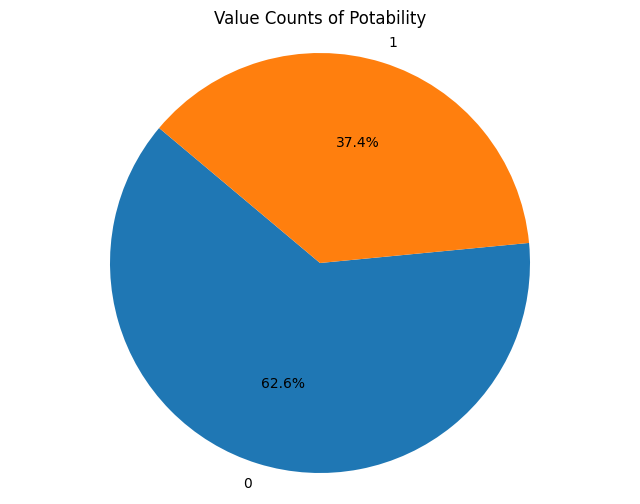

In [ ]:
# Calculate value counts of a column
value_counts = y_train.value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Value Counts of Potability')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **logistic regression**

In [ ]:
# Evaluate model on training set
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
train_pred = logistic_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print("Training set accuracy:", train_accuracy)

# Evaluate model on test set
test_pred = logistic_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print("Test set accuracy:", test_accuracy)

Training set accuracy: 0.5138993238166792
Test set accuracy: 0.5


              precision    recall  f1-score   support

           0       0.50      0.50      0.50       333
           1       0.50      0.50      0.50       333

    accuracy                           0.50       666
   macro avg       0.50      0.50      0.50       666
weighted avg       0.50      0.50      0.50       666



<Axes: >

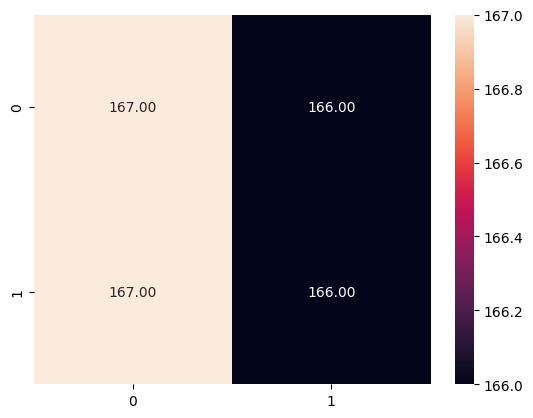

In [ ]:
print(classification_report(y_test, test_pred))
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt='.2f')

# **DecisionTree Model**

In [ ]:
# Step 3: Define the model

model = DecisionTreeClassifier()

# Step 4: Specify the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Step 5: Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Step 6: Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")
print(f"Test set accuracy: {accuracy_score(y_test, y_pred)}")
# Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
Best cross-validation score: 0.7449301019904357
Test set accuracy: 0.7522522522522522


In [ ]:
DT = DecisionTreeClassifier(criterion='gini',max_depth=10,max_features=None,min_samples_leaf=4,min_samples_split=5,splitter='best')
DT.fit(X_train,y_train)
#predict the test data
y_test_pred= DT.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_pred)
#predict the train data to see if there is overfitting
y_train_pred= DT.predict(X_train)
train_accuracy=accuracy_score(y_train,y_train_pred)
print("train accuracy",train_accuracy*100)
print("test accuracy ",test_accuracy*100)

train accuracy 86.58903080390684
test accuracy  74.02402402402403


              precision    recall  f1-score   support

           0       0.74      0.73      0.74       333
           1       0.74      0.75      0.74       333

    accuracy                           0.74       666
   macro avg       0.74      0.74      0.74       666
weighted avg       0.74      0.74      0.74       666



<Axes: >

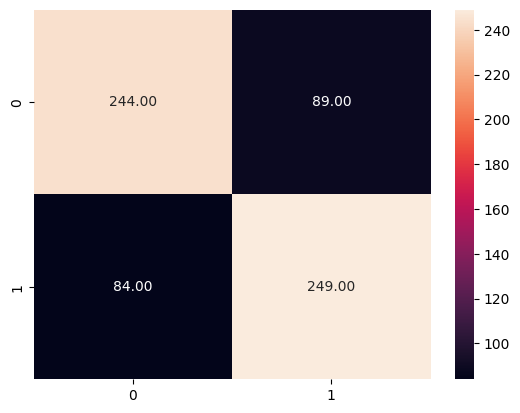

In [ ]:
print(classification_report(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.2f')

# **SVM Model**

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly']}

# SVM model
svm = SVC()

# GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Show best parameters found
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
#Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       333
           1       0.59      0.68      0.63       333

    accuracy                           0.61       666
   macro avg       0.61      0.61      0.60       666
weighted avg       0.61      0.61      0.60       666



In [ ]:
#Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
# SVM classifier with a rbf kernel
svm_classifier = SVC(C= 10, gamma = 1, kernel= 'rbf')

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6171171171171171


              precision    recall  f1-score   support

           0       0.63      0.57      0.60       333
           1       0.61      0.66      0.63       333

    accuracy                           0.62       666
   macro avg       0.62      0.62      0.62       666
weighted avg       0.62      0.62      0.62       666



<Axes: >

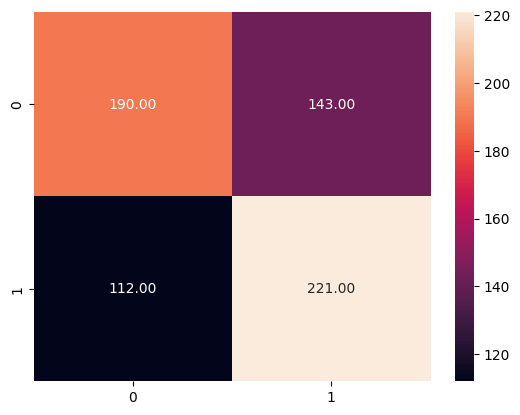

In [ ]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

In [ ]:

y_pred_train = svm_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)

Accuracy: 0.6765589782118707


# **Random Forest Model**

In [ ]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# Perform grid search
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train_resampled, y_train_resampled)

# Evaluate the best model
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# print(f"Best parameters found: {grid_search.best_params_}")
# print(f"Best cross-validation score: {grid_search.best_score_}")
# print(f"Test set accuracy: {accuracy_score(y_test, y_pred)}")

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8273273273273273


              precision    recall  f1-score   support

           0       0.85      0.80      0.82       333
           1       0.81      0.86      0.83       333

    accuracy                           0.83       666
   macro avg       0.83      0.83      0.83       666
weighted avg       0.83      0.83      0.83       666



<Axes: >

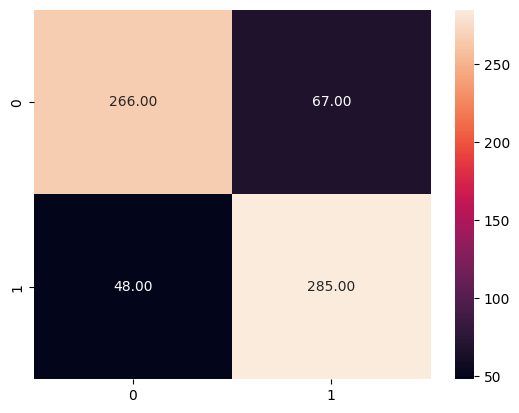

In [ ]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

# **KNN Model**

In [ ]:
# Define the parameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

#  KNN classifier
knn = KNeighborsClassifier()

# GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'n_neighbors': 3}

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.58      0.64       333
           1       0.65      0.76      0.70       333

    accuracy                           0.67       666
   macro avg       0.68      0.67      0.67       666
weighted avg       0.68      0.67      0.67       666



In [ ]:

# KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.71      0.58      0.64       333
           1       0.65      0.76      0.70       333

    accuracy                           0.67       666
   macro avg       0.68      0.67      0.67       666
weighted avg       0.68      0.67      0.67       666



<Axes: >

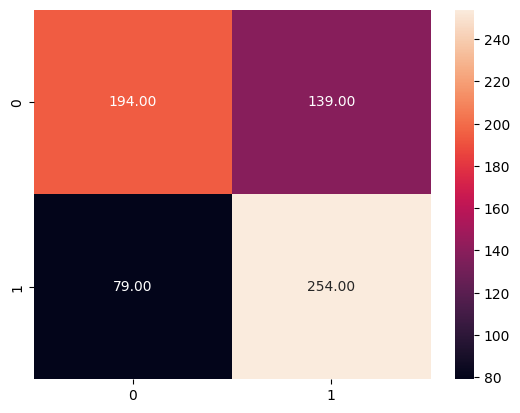

In [ ]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

#**Trying a differnt approach with the logistic regression and svm by replacing nulls with mean and scaling data only**

In [ ]:
# dataLogistic['ph'] = dataLogistic['ph'].fillna(dataLogistic['ph'].mean())
# dataLogistic['Sulfate'] = dataLogistic['Sulfate'].fillna(dataLogistic['Sulfate'].mean())
# dataLogistic['Trihalomethanes'] = dataLogistic['Trihalomethanes'].fillna(dataLogistic['Trihalomethanes'].mean())
# X = dataLogistic.drop('Potability', axis=1)
# y = dataLogistic['Potability']
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# logistic_model = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
# logistic_model.fit(X_train, y_train)
# train_pred = logistic_model.predict(X_train)
# train_accuracy = accuracy_score(y_train, train_pred)
# print("Training set accuracy:", train_accuracy)
# test_pred = logistic_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, test_pred)
# print("Test set accuracy:", test_accuracy)

In [ ]:
# print(classification_report(y_test, test_pred))
# sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt='.2f')

In [ ]:
# svm_classifier = svm.SVC(kernel='rbf')
# svm_classifier.fit(X_train, y_train)
# y_pred = svm_classifier.predict(X_test)
# print(y_pred)
# print(y_test)
# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [ ]:
# print(classification_report(y_test, y_pred))
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')